In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read the train dataset
df = pd.read_csv("traindata.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
# summary of the numerical fields
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
# Drop the loan ID and Gender columns.  They have no impact on loan approval
loans = df.drop("Loan_ID", axis = 1)
loans = loans.drop("Gender", axis = 1)
loans.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#Look at the data to see where the gaps are in the columns.  
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 52.8+ KB


In [6]:
# Convert all of the 3+ in dependents column to just 3
loans['Dependents']=loans['Dependents'].replace('3+','3')

In [7]:
# Replace NaNs in Dependents column with 0
loans.loc[loans['Dependents'].isnull(), 'Dependents'] = 0

In [8]:
# Replace the NaNs in Married when there is a Co-applicant with Yes
loans.loc[loans['Married'].isnull() & loans['CoapplicantIncome'] > 0, 'Married'] = "Yes"

In [9]:
# Replace the remaining NaNs in Married with No
loans.loc[loans['Married'].isnull(), 'Married'] = "No"

In [10]:
# Convert the Loan Status from Y/N to 1/0 
loans.loc[loans['Loan_Status']=="Y",'Loan_Status']=1
loans.loc[loans['Loan_Status']=='N','Loan_Status']=0

In [11]:
# Replace NaN's in Credit History when the loan was approved to yes/1
loans.loc[loans['Credit_History'].isnull() & loans['Loan_Status']==1, 'Credit_History'] = 1

In [12]:
# Replace remaining NaN's in Credit History with no/0
loans.loc[loans['Credit_History'].isnull(), 'Credit_History'] = 0

In [13]:
# Replace NaN's in Loan Amount Term with 360, which is the majority of loan terms
loans.loc[loans['Loan_Amount_Term'].isnull(), 'Loan_Amount_Term'] = 360

In [14]:
# Replace the NaN's in Self Employed with No
loans.loc[loans['Self_Employed'].isnull(), 'Self_Employed'] = 'No'

In [15]:
# Replace the NaN's in Loan Amount with the average loan amount
averageloan = loans['LoanAmount'].mean()
loans.loc[loans['LoanAmount'].isnull(), 'LoanAmount'] = averageloan

In [16]:
# Review the dataframe again to verify all NaN's are gone
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(4), int64(2), object(5)
memory usage: 52.8+ KB


In [17]:
# Save the clean data in a csv
loans.to_csv('CleanTrainData.csv')

In [18]:
# Analysis for outliers
plt.figure()

loans['LoanAmount'].plot.hist(bins=20)


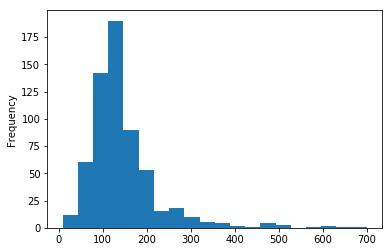

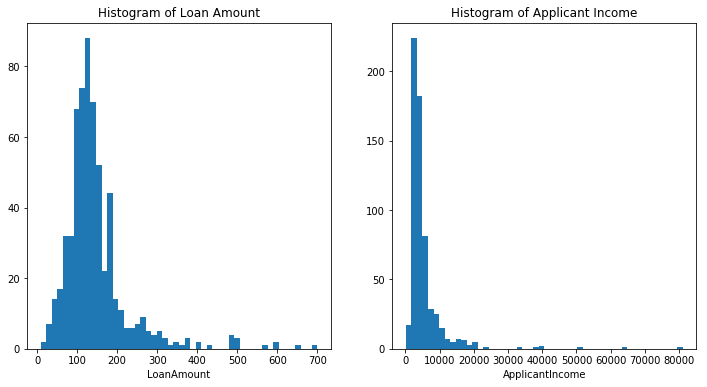

In [19]:
# Frequency charts for Loan Amount and Applicant Income
fig = plt.figure(figsize=(12, 6))
Amount = fig.add_subplot(121)
Income = fig.add_subplot(122)

Amount.hist(loans['LoanAmount'], bins=50)
Amount.set_xlabel('LoanAmount')
Amount.set_title("Histogram of Loan Amount")

Income.hist(loans['ApplicantIncome'], bins=50)
Income.set_xlabel('ApplicantIncome')
Income.set_title("Histogram of Applicant Income")

plt.show()

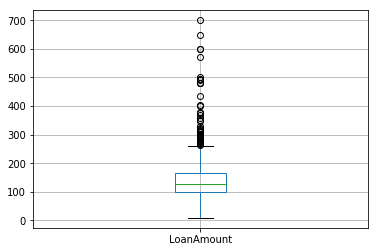

In [20]:
# Outliers and extreme values for LoanAmount
loans.boxplot(column='LoanAmount')
plt.show()


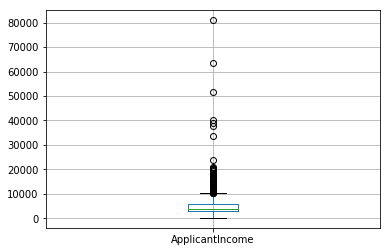

In [21]:
# Outliers and extreme values for 'ApplicantIncome'
loans.boxplot(column='ApplicantIncome')
plt.show()

In [22]:
#count of applicants by credit history 0 or 1
cred_history = loans['Credit_History'].value_counts(ascending=True)

# probability of getting loan based on credit history
# create a pivot table 
prob = pd.pivot_table(loans,index=["Credit_History"],values=["Loan_Status"],aggfunc=np.mean)


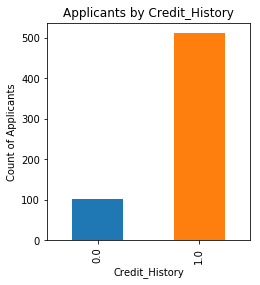

In [23]:
# plot the number of applicants vs credit_history(0 or 1)
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
cred_history.plot(kind='bar')
plt.show()



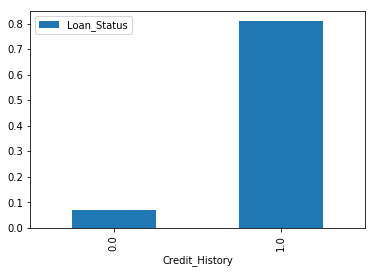

In [24]:
# plot Probability of getting a loan vs credit history(0 or 1)
ax2 = fig.add_subplot(122)
prob.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
plt.show()